# Multi-layer perceptrons with Keras (CAP5602 Lecture 10)

In this demo, we will train and test a multi-layer perceptron model on the MNIST handwritten digits dataset using Keras.

## 1. Load dataset

Like sklearn, Keras also provides an API to download and load the MNIST dataset. The following code snippet will download the data, load it into memory, and convert pixel values to [0, 1].

In [3]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

2022-09-29 00:58:57.954633: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## 2. Show a few training examples and its label

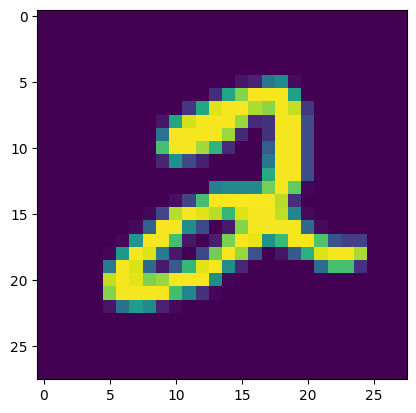

2


In [4]:
import matplotlib.pyplot as plt

img_id = 5
image = X_train[img_id]
label = Y_train[img_id]

plt.imshow(image)
plt.show()
print(label)

## 3. Flatten the inputs into vectors

When we load the data with Keras, the images are not flattened. So we flatten them into vectors to train with an MLP model.

In [5]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


## 4. Convert label vectors into one-hot encodings

When using Keras for classification, the labels have to be converted into one-hot encoding vectors. We can do this using the [to_categorial](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) method.

In [6]:
from tensorflow.keras.utils import to_categorical

num_classes = 10
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

print(Y_train.shape, Y_test.shape)

(60000, 10) (10000, 10)


## 4. Define the MLP model

We can define an MLP model using a [Sequential](https://keras.io/api/models/sequential/) model and the [Dense](https://keras.io/api/layers/core_layers/dense/) layers. In most cases, we will define a model as a Sequential model, and then add layers to it one-by-one.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

2022-09-29 00:59:04.342183: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 5. Compile the model

Before training a Keras model, we need to compile it to set up all the options for training, such as loss function, optimizer, and evaluation metrics. Here we will use cross entropy loss and the SGD optimizer. Our evaluation metric will be accuracy.

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## 6. Train the model

Now we can train the model using the `fit(...)` method. We can specify the number of epochs and batch size for training.

In [9]:
model.fit(X_train, Y_train, epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 1.3569 - accuracy: 0.6463
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5287 - accuracy: 0.8635
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4026 - accuracy: 0.8884
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.9005
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.9078
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3018 - accuracy: 0.9135
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2848 - accuracy: 0.9183
Epoch 8/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2704 - accuracy: 0.9228
Epoch 9/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2578 - accuracy: 0.9266
Epoch 10/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2467 - accura

## 7. Evaluate the trained model on test set

Finally, we can compute the model accuracy on the test set.

In [10]:
_, accuracy = model.evaluate(X_test, Y_test)

print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0875 - accuracy: 0.9729
0.9728999733924866
